In [1]:
from DataCollector import DataCollectorv2
from Dataset import DatasetHPs
from NNModel import NNModelHPs
from covit import CovitProject
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

In [2]:
dc = DataCollectorv2()

Building Data frame
Done building Data frame
Building remote dicts
Done building remote dicts
Building local dicts
Done building local dicts


In [3]:
covit = CovitProject(project_name="189Lins",
                     data_collector=dc)

In [4]:
models = [
    "nn1.6",
    "nn1.8"
         ]

for model in models:
    covit.loadNNModel(model)
    print("Model is {}".format(model))
    model_perf = covit.getResults(name=model).getPerf()
    val_min_loss = min(model_perf["val_loss"])
    val_min_idx = model_perf["val_loss"].index(val_min_loss)
    val_top1_max_acc = model_perf["val_top1_accuracy"][val_min_idx]
    print("===> val top1 accuracy = {}".format(val_top1_max_acc))

perf = {}
for model in models:
    covit.loadNNModel(model)
    model_perf = covit.getResults(name=model).getPerf()
    for metric in model_perf:
        if metric in perf:
            perf[metric].extend(model_perf[metric])
        else:
            perf.update({metric: model_perf[metric]})


2022-07-24 21:17:57.062074: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-24 21:17:57.062125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: sipl-gpu24-u.staff.technion.ac.il
2022-07-24 21:17:57.062143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: sipl-gpu24-u.staff.technion.ac.il
2022-07-24 21:17:57.062257: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-07-24 21:17:57.062286: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-07-24 21:17:57.062294: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2022-07-24 21:17:57.062840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library 

Model is nn1.6
===> val top1 accuracy = 0.8014453649520874
Model is nn1.8
===> val top1 accuracy = 0.8847593069076538


115
valid top1 accuracy 0.8847593069076538
valid top2 accuracy 0.9488450288772583
valid top5 accuracy 0.9765905141830444


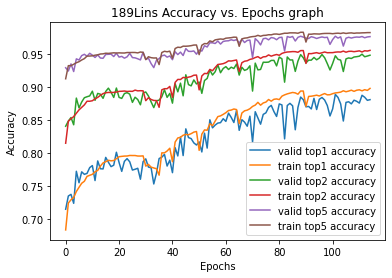

In [5]:
import matplotlib.pyplot as plt

plt.plot(perf["val_top1_accuracy"], label="valid top1 accuracy")
plt.plot(perf["top1_accuracy"], label="train top1 accuracy")
plt.plot(perf["val_top2_accuracy"], label="valid top2 accuracy")
plt.plot(perf["top2_accuracy"], label="train top2 accuracy")
plt.plot(perf["val_top5_accuracy"], label="valid top5 accuracy")
plt.plot(perf["top5_accuracy"], label="train top5 accuracy")

plt.legend()


plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("189Lins Accuracy vs. Epochs graph")

plt.savefig("acc.png")

val_min_loss = min(perf["val_loss"])
val_min_idx = perf["val_loss"].index(val_min_loss)
val_top1_max_acc = perf["val_top1_accuracy"][val_min_idx]
val_top2_max_acc = perf["val_top2_accuracy"][val_min_idx]
val_top5_max_acc = perf["val_top5_accuracy"][val_min_idx]
print(len(perf["val_top1_accuracy"]))
print("valid top1 accuracy {}".format(val_top1_max_acc))
print("valid top2 accuracy {}".format(val_top2_max_acc))
print("valid top5 accuracy {}".format(val_top5_max_acc))



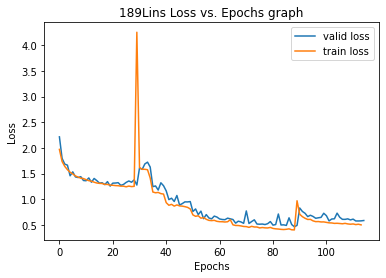

In [6]:
plt.plot(perf["val_loss"], label="valid loss")
plt.plot(perf["loss"][1:], label="train loss")

plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("189Lins Loss vs. Epochs graph")

plt.savefig("loss.png")

In [7]:
for model in models:
    print("Model is {}".format(model))
    model_times = covit.getResults(name=model).getTimes()
    num_epochs = 0
    for model_num_epochs in model_times["epochs"]:
        num_epochs += model_num_epochs
    batch_size = model_times["batch_size"][0]
    total_time = 0
    for model_train_time in model_times["time"]:
        total_time += model_train_time
    avg_time = total_time / num_epochs
    print("===> batch size = {}".format(batch_size))
    print("===> number of epochs = {}".format(num_epochs))
    print("===> average train time per epoch = {:.2f}[min]".format(avg_time / 60))

Model is nn1.6
===> batch size = 64
===> number of epochs = 30
===> average train time per epoch = 17.38[min]
Model is nn1.8
===> batch size = 48
===> number of epochs = 85
===> average train time per epoch = 24.41[min]
